# 実習07-1 教師なし学習の体験（主成分分析、k-means）
---
ここでは、scikit-learnのデータセットを使用して、主成分分析（PCA）とk-means法の基本的な動作について確認する。
教師なし学習の場合は、基本的な手順が以下のようになる。
1. データセットの準備
2. モデルを決める
3. 学習する
4. （必要に応じて）結果を確認する、モデルを使用する

一部参考：[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**【課題について】**
* **以下の流れに従ってコードブロックの該当部分にプログラムを記述し、実行していくこと。**
* **一部、テキストブロックに記入・追記する箇所もあるので注意すること**

## 1. 主成分分析（PCA）を使用した次元削減
### 1-1. データセットの準備

* 分類問題に使用されるアヤメのデータセットを使用する。ロードして変数代入しておく。
[sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

* dataset.dataがアヤメの情報、dataset.targetが分類番号（0,1,2）になっている。それぞれ、x、tという変数に入れておく。
* 分からない場合は、以前の実習（実習02など）のプログラムを確認すること。
* 今回は訓練用とテスト用に分割しない
```
# プログラム例
from ... import ...
dataset = ...
x = dataset.data
t = ...
```

In [ ]:
# データセットを読み込み、dataとtargetそれぞれ変数に入れる。
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target

### 1-2. モデルを決める
今回は主成分分析（PCA）を使用して、次元削減を行う。

skleanからインポートし、モデルを作成して変数に代入する。
今回は、引数にn_components=2 を指定して、出力を2次元にする（4次元→2次元の次元削減）
```
# インポート
from sklearn.decomposition import PCA
変数名 = PCA(n_components=2)
```


In [ ]:
# モデルを作成し変数に代入する（n_conponents=2）
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

### 1-3. 学習する
モデルに入力データを与え、fit()で学習させる。（入力はxのみ）

In [ ]:
# fitで学習
mod = pca.fit(x)
mod

PCA(n_components=2)

### 1-4 結果を確認する（数値）
transform()を用いて、モデルを使った分析をして値を変換する。変換結果をyに代入して値を確認する。出力が2次元になっていることを確認すること。
```
# 変換して値を確認
y = pca.transform(入力)
print(y)
```

In [ ]:
# 分析結果をyに代入
y = mod.transform(x)
y

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 表示して確認してみる（グラフ）
主成分分析に基づいた変換後のデータを確認してみる。
matplotlibのpyplotを使用して散布図を作成する。

2次元に変換したため、視覚的に確認できる。

（余裕があれば、分類ごとに色分けしてみる。）

```
# 列を指定してyの散布図を描く
import matplotlib.pyplot as plt # 上でインポートしていれば不要
# plt.scatterでyの0列目と1列目を指定する。
plt.scatter(y[:,0],y[:,1])
# 色を変える場合は、tによって場合分けするなどの方法がある。

# plt.plot()で表示する
```

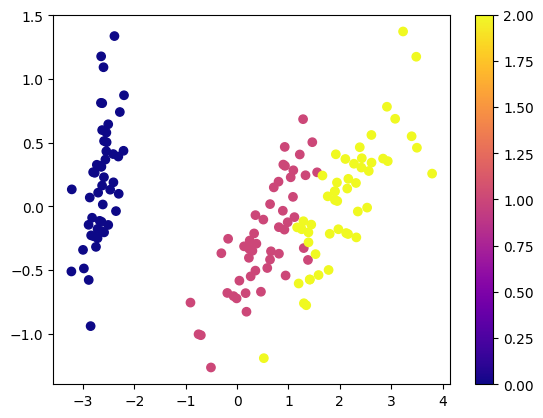

In [ ]:
# 列を指定してyの散布図を描く
import matplotlib.pyplot as plt
plt.scatter(y[:, 0], y[:, 1], c=t, cmap='plasma')
plt.colorbar()

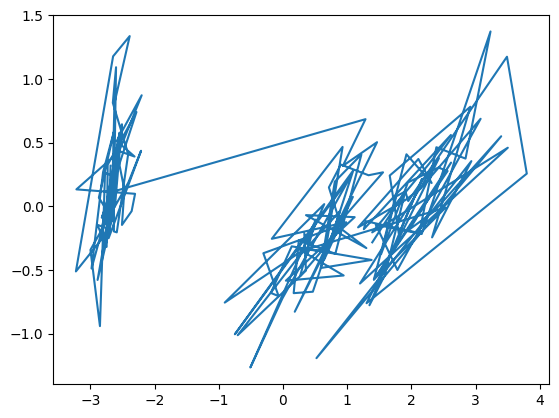

In [ ]:
plt.plot(y[:,0],y[:,1])

## 2. K-meansを使用したクラスタリング
### 2-1. データセットの準備
データセットは1と同じものを使用する。
もう一度データセットを読み込んでもよいし、1と同じものを使用してもよい。

In [ ]:
# もう一度データセットを読み込む場合はここで
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target

### 2-2. モデルを決める
今回はK-Meansを使用して、クラスタリングを行う。

skleanからインポートし、モデルを作成して変数に代入する。
今回は、引数にn_clusters=3 を指定して、3つのクラスタに分ける。
```
# インポート
from sklearn.cluster import KMeans
モデル名 = KMeans(n_clusters=3, random_state=学籍番号)
```


In [ ]:
# インポート
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2220042)

### 1-3. 学習する
モデルに入力データを与え、fit()で学習させる。（入力はxのみ）
fitの戻り値をresult保存しておく。
```
result = など
```
**※FutureWarningが出るが、とりあえずそのままで**

In [ ]:
# fitで学習させる。戻り値を変数に入れておく。
result = kmeans.fit(x)

### 2-4 結果を確認する（数値）
クラスタリングの結果は、"result.labels_"に格納されているので、表示して確認する。
。
```
# 表示して確認
print(result.labels_)
```

In [ ]:
# 表示して確認
result.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

参考までに、アヤメの種類（教師あり学習で正解ラベルに使用したもの）も表示しておく。
（tを表示すればよい。）

In [ ]:
# tを表示
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**[課題]クラスタリング結果と正解ラベルを比較して分かることを書いてください。**

* 　結果の意味と傾向の確認
* 　クラスタリングの限界を見つけること

補足：教師なし学習なので正解を学習しているわけでなく、「なんとなく3つに分けたらこうなりました」というイメージです。

## 3. 余裕があれば
「1.」の主成分分析で2次元に次元削減したデータ（y）を使用し、「2.」と同様の手順でK-meansで3つのクラスタに分け、クラスタリング後のラベルを使用して色分けをしたグラフを表示する。

In [ ]:
# 新しくKMeansのモデルを作成する
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
mod = pca.fit(x)

In [ ]:
# 主成分分析で2次元に次元削減したデータ（y）を使用して、クラスタリングを実施する。
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2220042)
result = kmeans.fit(mod.transform(x))

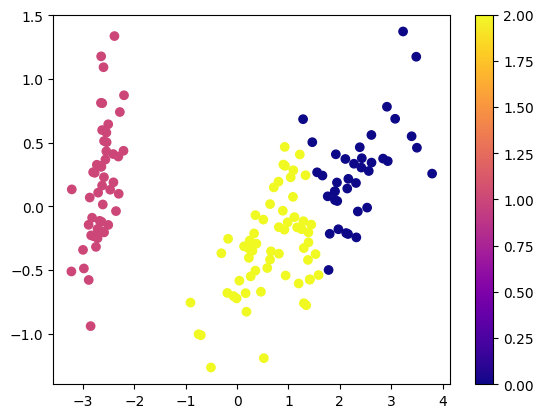

In [ ]:
# yの散布図を描く
import matplotlib.pyplot as plt
plt.scatter(y[:,0],y[:,1],c=result.labels_,cmap='plasma')
plt.colorbar()

# 提出について

*   テキストブロックへの追記（主成分分析の目的）
*   コードブロックの記入と実行（特に、グラフが2か所表示されているかどうか。）

が確認出来たら、**教員に結果（主成分分析の結果グラフ、k-meansのクラスタリング結果と分かること）を確認してもらうこと。**
その後、ファイルが保存されているかを確認し、「ファイル＞ダウンロード＞.ipynbをダウンロード」を順にクリックして.ipynbファイルをダウンロードする。

**ダウンロードしたipynbファイルを指定の場所に提出してください。**